# Project: Investigating The Movie Database (TMDb) dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will be performing an analysis on the The Movie Database (TMDb) dataset, this data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
Some of the questions that will be answered thrrough the analysis of this dataset include:
>
>1)Which movie generated the most profit?
>
>2)Which genres are the most successful?
>
>3)Which actors are associated with movies that have high revenues?
>
>4)Which production studios produced movies the that have high revenues?
>
>5)What is the average budget of movies with high revenue?
>
>6)What is the average revenue of movies with high revenue?
>
>7)What is the average runtime of movies with high revenue?
>
>8)What kinds of properties are associated with movies that have high revenues?


In [33]:
# import statements
import pandas as pd
import numpy as np
import csv
from datetime import datetime
%matplotlib inline
from matplotlib import pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will be making observations about the dataset by performing operations to inspect
>data types and look for instances of missing or possibly errant data.


In [2]:
# Load data
tmdb_df = pd.read_csv('tmdb_movies.csv')

In [3]:
#print out a few lines.
tmdb_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08


**View Dataset rows**: I used the head method to view the dataset and its features

In [4]:
#check datatype of columns
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**View Dataset datatypes**: The datatype of each column

In [5]:
#view dataset shape 
tmdb_df.shape

(10866, 21)

**View Dataset shape**: dataset originally has 10866 rows and 21 columns

In [6]:
#view missing values in the dataset
tmdb_df.isnull().sum()
#dropping null rows will be neccessary if I want to perform analysis on cast,director,production_companies and genre

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**View Dataset missing values**: The dataset cast, homepage, director, tagline, keywords, overview, genres, production_companies columns have missing values.
>Dropping null rows will be neccessary to perform accurate analysis on cast,director,production_companies and genre

In [7]:
#view duplicate values in dataset
tmdb_df.duplicated().sum()

1

**View Dataset duplicated values**: Dataset has a single duplicate value

### Data Cleaning 

#### Important observation regarding this process

>1)We need to remove unused column such as id, imdb_id, vote_count, keywords, homepage etc.
>
>2)Removing the duplicacy in the rows.
>
>3)Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries
>
>4)Changing release date column into date format.
>
>5)Replacing zero with NAN in runtime column.
>
>6)Changing format of budget and revenue column.
>
>7)Removing null rows in cast, director, production_companies and genres

> **1) Remove unused columns**
>
>i.e imdb_id, vote_count, production_company, keywords, homepage etc: 

In [8]:
#drop unused columns
tmdb_df.drop(['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average'], axis=1,inplace=True)
#confirm changes
tmdb_df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015


> **2) Remove duplicate rows**

In [9]:
# drop duplicates in dataset
tmdb_df.drop_duplicates(inplace=True)
#confirm changes
tmdb_df.duplicated().any()

False

> **3) Drop rows where budget or revenue is zero**: 

In [10]:
#Drop rows where budget or revenue is equal to zero
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_df[temp_list] = tmdb_df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_df.dropna(subset = temp_list, inplace = True)
tmdb_df[temp_list].isnull().any()


budget     False
revenue    False
dtype: bool

> **4) Change release date to it's correct data type(object to datetime)**

In [11]:
#convert release_date to datetime
tmdb_df.release_date = pd.to_datetime(tmdb_df['release_date'])
#preview changes
tmdb_df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


>**5) Replace zero with null in runtime column**

In [12]:
#this will replace all the values in runtime from '0' to NAN.
tmdb_df['runtime'] = tmdb_df['runtime'].replace(0, np.NAN)

>**6) Change the format of the budget and revenue columns**

In [13]:
#view datatypes
tmdb_df.dtypes

budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

In [14]:
#convert budget, revenue to int from float
tmdb_df[temp_list] = tmdb_df[temp_list].applymap(np.int64)
tmdb_df.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

>**7) Remove null rows in cast, director, production_companies and genres**

In [15]:
null_rows = ['cast', 'director', 'production_companies','genres']
#view null rows in columns
tmdb_df[null_rows].isnull().sum()

cast                     4
director                 1
production_companies    46
genres                   0
dtype: int64

In [16]:
#drop null rows in columns
tmdb_df.dropna(subset = null_rows, inplace = True)
#preview changes
tmdb_df[null_rows].isnull().sum()

cast                    0
director                0
production_companies    0
genres                  0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Calculate the profit made by each movie**: Create a column called profit by subtracting revenue from budget.


In [17]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
tmdb_df.insert(2,'profit',tmdb_df['revenue']-tmdb_df['budget'])

#previewing the changes in the dataset
tmdb_df.head(2)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015


### Research Question 1: Which movies made the most and list profit ###

In [54]:
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_df[column].idxmax()
    high_details=pd.DataFrame(tmdb_df.loc[high])
    
    #for lowest earned profit
    low= tmdb_df[column].idxmin()
    low_details=pd.DataFrame(tmdb_df.loc[low])
    
    #collecting data in one place
    info=pd.concat([high_details, low_details],names=['Series name', 'Row ID'], axis=1)
    
    return info

#calling the function
calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


>**The most profitable movie is James Cameron's AVATAR with a profit of over 254 million**
>
>**The least profitable is Sngmoo Lee's THE WARRIOR'S WAY with a loss of over 413 million**

### Research Question 2: Most successful genres

> **With respect to the profitable movies**
>
>For this analysis we will be considering only those movies who have earned a significant amount of profit (>50 million).

In [19]:
#selecting the movies having profit 50M or more
profit_data = tmdb_df[tmdb_df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015


In [20]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    data = data.value_counts(ascending = False)
    
    return count

In [41]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       492
Drama        480
Action       463
Thriller     404
Adventure    379
dtype: int64

>**lets plot the graph of the collected data**

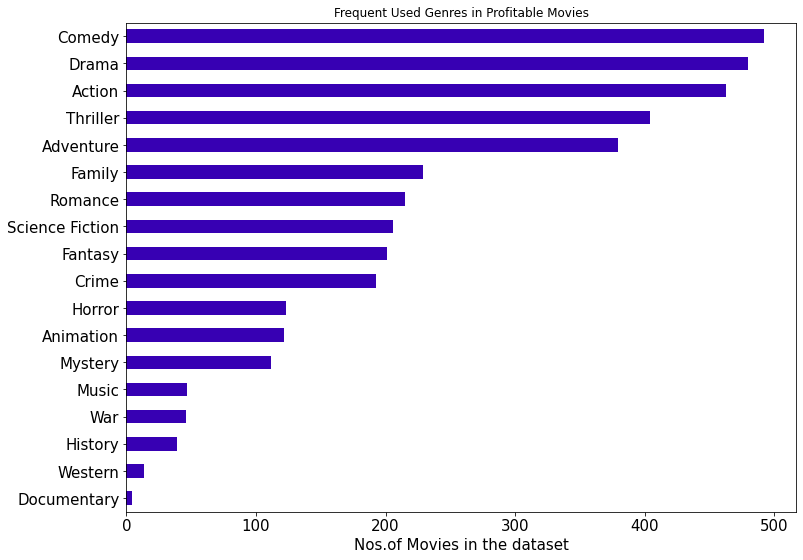

In [42]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#3700B3', fontsize = 15 )

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '15')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show();

> **Comedy is the genre that has investors laughing to the bank**

### Research Question 3: Which actors are associated with movies that have high revenues?

In [46]:
#variable to store the retured value for actors
count = data('cast')
#perform analysis on top ten values
count= count.head(10)
count

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
Harrison Ford         19
Bruce Willis          19
Jim Carrey            19
Robert De Niro        19
Denzel Washington     19
dtype: int64

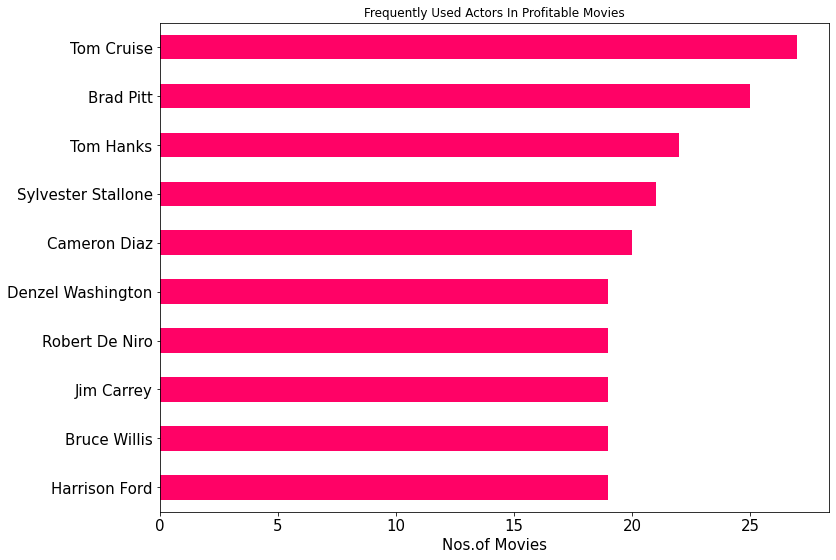

In [45]:
#lets plot the points in descending order top to bottom as we have data in same format
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#FF0266', fontsize = 15 )

#title
lt.set(title = 'Frequently Used Actors In Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies', color = 'black', fontsize = '15')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show();

>**Tom cruise has the highest number of roles in the most profitable movies**

### Research Question 4: Which production studios produce with movies that have high revenues?

In [37]:
#variable to store the retured value for production studios
count = data('production_companies')
#printing top 5 values
count= count.head(10)
count

Universal Pictures                        156
Warner Bros.                              144
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    118
Columbia Pictures                          93
Walt Disney Pictures                       78
New Line Cinema                            67
Columbia Pictures Corporation              51
Relativity Media                           50
Touchstone Pictures                        46
dtype: int64

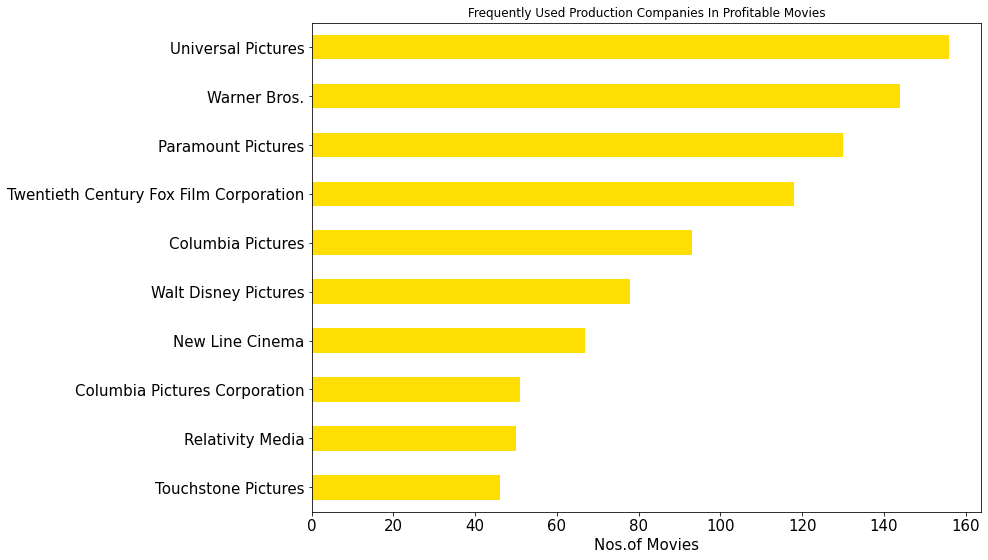

In [40]:
#lets plot the points in descending order top to bottom as we have data in same format
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#FFDE03', fontsize = 15 )

#title
lt.set(title = 'Frequently Used Production Companies In Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies', color = 'black', fontsize = '15')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show();

### Research Question 5: What is the average budget of movies with high revenue?

In [48]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [49]:
# calling the above function for budget
profit_avg('budget')

60483360.870605834

>**The average budget of movies with high revenues(>=50 million) is just above 60 million**

### Research Question 6: What is the average revenue of movies with high revenue?

In [51]:
# calling the above function for revenue
profit_avg('revenue')

255091512.7539267

>**The average revenue for profitable movies is just above 255 million**

### Research Question 7: What is the average runtime of movies with high revenue?

In [53]:
# calling the above function for runtime
profit_avg('runtime')

113.61555721765146

>**The average runtime for profitable movies is above 113 minutes**

<a id='conclusions'></a>
## Conclusions

At the end  of this interesting data analysis. I discovered some unexpected facts about the movies. Here are some of the insights I ganered:

For a Movie to be in the successful category(50 million or more in revenue)

1. It's Average Budget should be around 60 millon.
2. It's Average duration of the movie should be around 113 minutes.
3. Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
4. Genre must be : Action, Adventure, Thriller, Comedy, Drama.

By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million.

Limitations: 
1. This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar as a metric for a successfull movie. 

2. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit.

3. I Can not confirm the authenticity of the data provided

4. As mentioned earlier the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in.So a disparity arises here which can state the complete analysis wrong. 

5. Dropping the rows with missing values also affected the overall analysis.
